# Problème 7 : Matrices et transformations affines du plan


Dans ce problème, on s'intéresse aux application de $\mathbb{R}^2$ dans $\mathbb{R}^2$ de la forme

$$
x \mapsto Ax+b,
$$

où $A$ est une matrice réelle de taille $2 \times 2$ et $b$ un vecteur réel de taille $2$.

Une application de cette forme peut s'interpréter comme une **transformation géométrique du plan**, c'est-à-dire une application qui transforme un point du plan en un autre point du plan. En effet, en munissant le plan d'un repère, on peut représenter chaque point du plan par un couple de coordonnées, c'est-à-dire par un vecteur de $\mathbb{R}^2$.

Ces applications sont plus précisément appelées **transformations affines du plan**. Parmi elles, on trouve les **translations**, les **rotations**, les **symétries axiales**, etc.

Nous souhaitons programmer des classes permettant de représenter et de manipuler les transformations affines. Pour cela, nous commencerons par créer des classes pour les vecteurs et les matrices.

Enfin, en guise d'application, nous utiliserons des transformations affines pour gérer le déplacement d'un vaisseau dans un jeu vidéo 2D.

## A. Classes `Vec` et `Mat`

* Créer une classe `Vec` pour représenter et manipuler les vecteurs.
    * Un objet de cette classe aura pour unique attribut :
        * `coeff`: la liste des coefficients du vecteur.
    * La méthode `__init__` prendra en paramètre (en plus de `self`) la liste des coefficients du vecteur.
    * Cette classe contiendra également les méthodes suivantes :
        * `__repr__` ;
        * `__add__`, qui renvoie la somme de deux vecteurs ;
        * `__neg__` qui renvoie l'opposé d'un vecteur ;
        * `__sub__`, qui renvoie la différence de deux vecteurs ;
        * `__mul__`, qui renvoie le produit d'un vecteur par un réel ;
        * `norme`, qui renvoie la norme euclidienne d'un vecteur.
        
Pour compléter la description de cette classe, voici des exemples d'utilisation.    
~~~py
>>> Vec([-1, 4, 2])
Vec([-1, 4, 2])

>>> Vec([2, 0, 1]) + Vec([1, 2, -1])
Vec([3, 2, 0])

>>> Vec([1, 2, 0, -1]) * 2
Vec([2, 4, 0, -2])

>>> -Vec([1, 2])
Vec([-1, -2])

>>> Vec([2, 0, 1]) - Vec([1, 2, -1])
Vec([1, -2, 2])

>>> Vec([3, 4]).norme()
5.0
~~~

In [1]:
import math

class Vec:
    def __init__ (self, coeff):
        self.coeff = coeff
    
    def __repr__(self):
        """
        >>> Vec([-1, 4, 2])
        Vec([-1, 4, 2])
        """
        return "Vec(" + str(self.coeff) + ")"
    
    def __add__(self, other):
        """
        Renvoie la somme de deux vecteurs
        >>> Vec([2, 0, 1]) + Vec([1, 2, -1])
        Vec([3, 2, 0])
        """
        lst = []
        for i in range(len(self.coeff)):
            lst.append(self.coeff[i] + other.coeff[i])
        return Vec(lst)
    
    def __neg__(self):
        """
        Renvoie l'opposé d'un vecteur
        >>> -Vec([1, 2])
        Vec([-1, -2])
        """
        lst = []
        for i in range(len(self.coeff)):
            lst.append(-1 *self.coeff[i])
        return Vec(lst)
        
    def __sub__(self, other):
        """
        Renvoie la différence de deux vecteurs
        >>> Vec([2, 0, 1]) - Vec([1, 2, -1])
        Vec([1, -2, 2])
        """
        return Vec(self.coeff) + (- Vec(other.coeff))
    
    def __mul__(self, other):
        """
        Renvoie le produit d'un vecteur par un réel
        >>> Vec([1, 2, 0, -1]) * 2
        Vec([2, 4, 0, -2])
        """
        lst = []
        for i in range(len(self.coeff)):
            lst.append(other *self.coeff[i])
        return Vec(lst)
    
    def norme(self):
        """
        Renvoie la norme euclidienne d'un vecteur
        >>> Vec([3, 4]).norme()
        5.0
        """
        resultat = 0;
        for i in range(len(self.coeff)):
            resultat += self.coeff[i] * self.coeff[i]
        return math.sqrt(resultat)

- Insérer des tests (*doctests*) dans les chaînes de documentation (*docstrings*) des différentes méthode de la classe `Vec`. Tester la classe `Vec` avec la commande `testmod` du module `doctest`.

In [2]:
from doctest import testmod
testmod()

TestResults(failed=0, attempted=6)

* Créer une classe `Mat` pour représenter et manipuler les matrices.
    * Un objet de cette classe aura pour unique attribut :
        * `coeff`: les coefficients de la matrice sous forme d'une liste d'une listes (chaque sous-liste correspondant à une ligne de la matrice).
    * La méthode `__init__` prendra en paramètre (en plus de `self`) la liste des coefficients du vecteur.
    * Cette classe contiendra également les méthodes suivantes :
        * `__repr__` ;
        * `__add__`, qui renvoie la somme de deux matrices ;
        * `__mul__`, qui renvoie le produit d'une matrice par une matrice ou par un vecteur (selon la nature de l'opérande de droite).
        
Indication : Dans la méthode `__init__`, utiliser la fonction `deepcopy` du module `copy` pour copier la liste de listes fournie en paramètre.

Pour compléter la description de cette classe, voici des exemples d'utilisation.  
```py
>>> Mat([[1, 0, 1], [2, 1, 1]])
Mat([[1, 0, 1], [2, 1, 1]])

>>> A = Mat([[1, 0, 1], [2, 1, 1]])
>>> B = Mat([[-1, 1, 0], [0, 2, -1]])  
>>> A + B
Mat([[0, 1, 1], [2, 3, 0]])

>>> C = Mat([[1, 1], [2, 0], [1, -1]])  
>>> A * C
Mat([[2, 0], [5, 1]])

>>> A * Vec([1, 0, 1])
Vec([2, 3])
```

In [3]:
import copy 

class Mat:
    def __init__ (self, coeff):
        self.coeff = copy.deepcopy(coeff)
         
    def __repr__(self):
        """
        >>> Mat([[1, 0, 1], [2, 1, 1]])
        Mat([[1, 0, 1], [2, 1, 1]])
        """
        return "Mat(" + str(self.coeff) + ")"
    
    def __add__(self, other):
        """
        >>> A = Mat([[1, 0, 1], [2, 1, 1]])
        >>> B = Mat([[-1, 1, 0], [0, 2, -1]])  
        >>> A + B
        Mat([[0, 1, 1], [2, 3, 0]])
        """
        lst = [[],[]]
        for i in range(len(self.coeff)):
            for j in range(len(self.coeff[0])):
                lst[i].append(self.coeff[i][j] + other.coeff[i][j])
        return Mat(lst)
       
    def __mul__(self, other):
        """Multiplication par un vecteur ou une matrice.
        >>> A = Mat([[1, 0, 1], [2, 1, 1]])
        >>> C = Mat([[1, 1], [2, 0], [1, -1]])  
        >>> A * C
        Mat([[2, 0], [5, 1]])
        >>> A * Vec([1, 0, 1])
        Vec([2, 3])
        """
        if isinstance(other, Vec):
            lst = []
            for j in range(len(self.coeff)):
                x = 0
                for i in range(len(other.coeff)):
                    x += self.coeff[j][i] * other.coeff[i]
                lst.append(x)
            return Vec(lst)
            
        elif isinstance(other, Mat):
            lst = [[0] * len(other.coeff[0]) for i in range(len(self.coeff))]
            for k in range(len(other.coeff[0])):
                for j in range(len(self.coeff)):
                    x = 0
                    for i in range(len(other.coeff)):
                        x += self.coeff[k][i] * other.coeff[i][j]
                    lst[k][j] = x
            return Mat(lst)


- Insérer des tests (*doctests*) dans les chaînes de documentation (*docstrings*) des différentes méthode de la classe `Mat`. Tester la classe `Mat` avec la commande `testmod` du module `doctest`.

In [4]:
from doctest import testmod
testmod()

TestResults(failed=0, attempted=14)

- Quelle est la complexité (en nombre d'additions/multiplications) de :
    - la méthode `__add__` pour calculer la somme de deux matrices carrées de taille $n$ ?
    - la méthode `__mul__` pour calculer le produit de deux matrices carrées de taille $n$ ?
    - la méthode `__mul__` pour calculer le produit d'une matrice carrée de taille $n$ avec un vecteur de taille $n$ ?

<div style= "color : blue">
    
- la méthode `__add__` est de complexité $n^{2}$ 
    
- la méthode `__mul__` pour deux matrices carrée est de complexité $(2n -1) n^{2}$
    
- la méthode `__mul__` pour une matrice carrée et un vecteur est de complexité $(2n -1) n$
</div>

## B. Transformations affines

### B.1. Quelques résultats théoriques

- Une transformation affine du plan est-elle une application linéaire de $\mathbb{R}^2$ dans $\mathbb{R}^2$ ?

<div style= "color : blue">
     
Soit $f$ une application affine du plan tel que:

$$\mathbb{R}^2 \to \mathbb{R}^2$$

$$(x, y) \mapsto A \begin{pmatrix} x \\ y \end{pmatrix} + b$$

où $A$ est une matrice réelle de taille $2 \times 2$ et $b$ un vecteur réel de taille $2$

On pose $u=(x,y)$ et $v=(x',y')$ et $\lambda \in \mathbb{K}$

$f(u+\lambda v) = A [\begin{pmatrix} x \\ y \end{pmatrix} + \lambda \begin{pmatrix} x' \\ y' \end{pmatrix}] + b$

$\qquad\quad = A \begin{pmatrix} x \\ y \end{pmatrix} + \lambda A \begin{pmatrix} x' \\ y' \end{pmatrix} + b$

On pose $b'$ un vecteur réel de taille 2 tel que $b' = b/2$.

On a alors: 

$f(u+\lambda v) = A \begin{pmatrix} x \\ y \end{pmatrix} + \lambda A \begin{pmatrix} x' \\ y' \end{pmatrix} + 2b'$

$\qquad\quad = A \begin{pmatrix} x \\ y \end{pmatrix} + b' + \lambda A \begin{pmatrix} x' \\ y' \end{pmatrix} + b'$

$\qquad\quad = f(u) + \lambda f(v)$

Donc oui une transformation affine du plan est une application linéaire de $\mathbb{R}^2$ dans $\mathbb{R}^2$.
    
</div>

- Montrer que la composition de deux transformations affines du plan est-encore une transformation affine du plan.

<div style= "color : blue">
    
$A$ est une matrice réelle de taille $2 \times 2$ et $b$ un vecteur réel de taille $2$

Soient $f$ et $g$ deux applications linéaires:

$$f:\mathbb{R}^2 \to \mathbb{R}^2 \qquad\qquad\qquad\qquad\qquad g:\mathbb{R}^2 \to	\mathbb{R}^2$$
$$(x, y) \mapsto A \begin{pmatrix} x \\ y \end{pmatrix} + b \qquad\qquad\qquad\qquad (x, y) \mapsto A \begin{pmatrix} x \\ y \end{pmatrix} + b$$

On a alors $g(x,y) = A\begin{pmatrix} x \\ y \end{pmatrix} + b \qquad avec \qquad A=\begin{pmatrix} \lambda_{1}&\lambda_{2} \\ \lambda_{3}&\lambda_{4} \end{pmatrix} \quad et \quad b=\begin{pmatrix} \eta_{1} \\ \eta_{2} \end{pmatrix} \qquad\qquad\qquad
\lambda_{1},\lambda_{2},\lambda_{3},\lambda_{4},\eta_{1},\eta_{2}	\in \mathbb{R}$

$\qquad\quad g(x,y) = \begin{pmatrix} \lambda_{1}&\lambda_{2} \\ \lambda_{3}&\lambda_{4} \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} + \begin{pmatrix} \eta_{1} \\ \eta_{2} \end{pmatrix}$

$\qquad\qquad\qquad = \begin{pmatrix} \lambda_{1}x+\lambda_{2}y \\ \lambda_{3}x+\lambda_{4}y \end{pmatrix} + \begin{pmatrix} \eta_{1} \\ \eta_{2} \end{pmatrix}$

$\qquad\qquad\qquad = \begin{pmatrix} \lambda_{1}x+\lambda_{2}y+\eta_{1} \\ \lambda_{3}x+\lambda_{4}y+\eta_{2} \end{pmatrix}$

On pose $ x'=\lambda_{1}x+\lambda_{2}y+\eta_{1} \quad et \quad y'= \lambda_{3}x+\lambda_{4}y+\eta_{2} \qquad\qquad\qquad (x',y') \in \mathbb{R}^2$

Donc $g(x,y) = \begin{pmatrix} x' \\ y' \end{pmatrix}$

$(f \circ g)(x,y) = f(g(x,y)) = f(x',y') = A\begin{pmatrix} x' \\ y' \end{pmatrix} + b $

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad = \begin{pmatrix} \lambda_{1}&\lambda_{2} \\ \lambda_{3}&\lambda_{4} \end{pmatrix} \begin{pmatrix} x' \\ y' \end{pmatrix} + \begin{pmatrix} \eta_{1} \\ \eta_{2} \end{pmatrix}$

$\qquad\qquad\qquad\qquad\qquad\qquad\qquad = \begin{pmatrix} \lambda_{1}x'+\lambda_{2}y'+\eta_{1} \\ \lambda_{3}x'+\lambda_{4}y'+\eta_{2} \end{pmatrix}$

Donc la composition de deux transformations affines du plan est bien une transformation affine du plan.
    
</div>

**Translations**

Soit $v \in \mathbb{R}^2$. On appelle **translation de vecteur $v$** la transformation affine où $A$ est la matrice identité et $b =v$. On la note $T_v$.

- Quelle est l'application réciproque de $T_v$ ? Justifier en vérifiant que la composée de $T_v$ et de sa réciproque est bien égale à l'application identité. (Indication : D'un point de vue géométrique, l'application réciproque "ramène" un point à sa position initiale.)

<div style= "color : blue">
L'application réciproque de $\qquad T_{v}^{1}: \mathbb{R}^2 \to \mathbb{R}^2\qquad$ est $\qquad\qquad\quad T_{v}^{-1}: \mathbb{R}^2 \to \mathbb{R}^2$

$\qquad\qquad\qquad\qquad\qquad\qquad x \mapsto Ax + v \qquad\qquad\qquad $ $\qquad\quad Ax + v \mapsto x$

Justification:

$T_{v}^{-1} (T_{v}(x)) = T_{v}^{-1} (Ax + v) = x$

D'après les indications: pour tout $x \in \mathbb{R}^2 \qquad T_{v}^{-1} (T_{v}) = x, \qquad T_{v}^{-1} \circ T_{v} = Id_{x}$

Donc la vérification est bonne.
</div>

**Rotations**

On appelle **rotation de centre l'origine et d'angle $\theta$** la transformation affine où $\displaystyle A = \begin{pmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta \\
\end{pmatrix}$ et $b$ est le vecteur nul. On la note $R_\theta$.

- Quelle est l'application réciproque de $R_\theta$ ? Justifier en vérifiant que la composée de $R_\theta$ et de sa réciproque est bien égale à l'application identité 

<div style= "color : blue">
    
L'application réciproque de $\qquad R_{\theta}: \mathbb{R}^2 \to \mathbb{R}^2\qquad\qquad\qquad$ est $\qquad\qquad\qquad\qquad R_{\theta}^{-1}: \mathbb{R}^2 \to \mathbb{R}^2$

$\qquad\qquad\qquad\qquad x \mapsto \begin{pmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta \\
\end{pmatrix} x \qquad\qquad\qquad $ $\qquad\quad \begin{pmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta \\
\end{pmatrix} x \mapsto x$

Justification:

$R_{\theta}^{-1} (R_{\theta}(x)) = R_{\theta}^{-1} [\begin{pmatrix}
\cos \theta & -\sin \theta \\
\sin \theta & \cos \theta \\
\end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix}] = x$
    
Donc la vérification est bonne.
</div>

* La rotation de centre $C$ et d'angle $\theta$ est l'applcation $
T_{\vec{OC}} \circ R_{\theta} \circ T_{\vec{CO}}$. Exprimer cette application sous la forme $x \mapsto Ax + b$.

<div style= "color : blue">

On a: $\qquad T_{\vec{CO}} (x) = x + \vec{CO}$ 

$\qquad\qquad T_{\vec{OC}} (x) = T_{\vec{-OC}} = T^{-1}_{\vec{CO}} = x - \vec{CO} $

$\qquad\qquad R_{\theta} = Ax$ 

$ $

$(T_{\vec{OC}} \circ R_{\theta} \circ T_{\vec{CO}}) (x) = T_{\vec{OC}}(R_{\theta}(T_{\vec{CO}}(x)))$

$\qquad\qquad\qquad\quad = T_{\vec{OC}}(A(x + \vec{CO}))$

$\qquad\qquad\qquad\quad = A (x + \vec{CO}) - \vec{CO}$

Cette application sous la forme $x \mapsto Ax + b$
    
</div>

**D'autres transformations**

* Comment interpréter géométriquement les transformations affines suivantes ?
    - $\displaystyle A = \begin{pmatrix}
    1 & 0 \\
    0 & -1 \\
    \end{pmatrix}$ et $b$ est le vecteur nul
    - $\displaystyle A = \begin{pmatrix}
    0 & 0 \\
    0 & 1 \\
    \end{pmatrix}$ et $b$ est le vecteur nul
    - $\displaystyle A = \begin{pmatrix}
    2 & 0 \\
    0 & 2 \\
    \end{pmatrix}$ et $b$ est le vecteur nul

<div style= "color : blue">

- $ \begin{pmatrix}
    1 & 0 \\
    0 & -1 \\
    \end{pmatrix}
    \begin{pmatrix} a \\ b \end{pmatrix} = \begin{pmatrix} a \\ -b \end{pmatrix}$ On peut donc dire qu'il s'agit d'une symétrie axiale par rapport à l'axe des abscisses.
    
- $ \begin{pmatrix}
    0 & 0 \\
    0 & 1 \\
    \end{pmatrix}
    \begin{pmatrix} a \\ b \end{pmatrix} = \begin{pmatrix} 0 \\ b \end{pmatrix}$ On peut donc dire qu'il s'agit d'une projection sur l'axe des ordonnées.
    
- $ \begin{pmatrix}
    2 & 0 \\
    0 & 2 \\
    \end{pmatrix}
    \begin{pmatrix} a \\ b \end{pmatrix} = \begin{pmatrix} 2a \\ 2b \end{pmatrix}$ On peut donc dire qu'il s'agit d'une homothétie (transformation géométrique par agrandissement ou réduction) de rapport 2 et qui a pour centre l'origine.
      

### B.2. Classes pour les transformations affines

Nous allons maintenant écrire des classes permettant de représenter respectivement des transformations affines quelconques, des rotations et des translations. 

Nous utiliserons le principe *d'héritage* (notion nouvelle) pour rassembler le code commun à plusieurs transformations (par exemple la méthode `compose`, qui est *héritée* de la classe `TransAffine2D`dans les classes `Rotation2D` et `Translation2D`).

- Compléter les classes suivantes de manière à ce que tous les doctests fonctionnent.

#### Classe générale

In [5]:
class TransAffine2D:
    """Transformation affine (quelconque) du plan.
    
    >>> A = Mat([[1, -1], [1, 1]])
    >>> b = Vec([1, -1])
    >>> phi = TransAffine2D(A, b)
    >>> phi.applique(Vec([0, 1]))
    Vec([0, 0])
    >>> phi.applique(Vec([1, 0]))
    Vec([2, 0])
    
    >>> phi2 = phi.compose(phi)
    >>> phi2.applique(Vec([1, 0]))
    Vec([3, 1])
    """
    
    def __init__(self, mat=None, vec=None):
        # par défaut, on construit la transformation identité
        self.mat = Mat([[1, 0], [0, 1]]) if mat is None else mat
        self.vec = Vec([0, 0]) if vec is None else vec
        
    def __repr__(self):
        return "TransAffine2D({}, {})".format(
            repr(self.mat), repr(self.vec))
    
    def compose(self, other):
        """Construit la transformation (self o other).
        
        Attention à l'ordre ! La transformation composée
        revient à appliquer d'abord other, puis self.
        """
        mat = self.mat * other.mat
        vec = self.mat * other.vec + self.vec
        return TransAffine2D(mat, vec)
    
    def applique(self, vecteur):
        """Applique la transformation self à vecteur."""
        return self.mat * vecteur +  self.vec 

In [6]:
from doctest import testmod
testmod()

TestResults(failed=0, attempted=21)

#### Rotations

In [7]:
from math import cos, sin, pi

class Rotation2D(TransAffine2D):
    """Rotation déterminée par un centre (vecteur 2D) et un angle.
    
    Cette classe hérite de TransAffine2D et ses instances ont 
    les mêmes attributs mat et vec.
    
    >>> r = Rotation2D(Vec([1, 1]), pi/2)
    >>> r.applique(Vec([0, 0]))
    Vec([2.0, 0.0])
    
    >>> r2 = r.compose(r)
    >>> r2.applique(Vec([0, 0]))
    Vec([2.0, 2.0])
    """
    def __init__(self, centre, angle):
        self.centre = centre
        self.angle = angle
        
        A = ([cos(self.angle), -sin(self.angle)], [sin(self.angle), cos(self.angle)])
        self.mat = Mat(A)
        self.vec = self.centre - (self.mat * self.centre)
        
    def __repr__(self):
        return "Rotation2D({}, {})".format(repr(self.centre), repr(self.angle))


#### Translations

In [8]:
class Translation2D(TransAffine2D):
    """Translation définie par un vecteur.
    
    >>> t = Translation2D(Vec([1, 0]))
    >>> t.applique(Vec([0, 0]))
    Vec([1, 0])
    """
    def __init__(self, vec):
        self.mat = Mat(([1,0], [0, 1])) 
        self.vec = vec 
        
    def __repr__(self):
        return "Translation2D({})".format(repr(self.vec))

In [9]:
from doctest import testmod
testmod()

TestResults(failed=0, attempted=27)

#### Essais

Pour mieux visualiser l'effet de certaines transformations affines, nous allons dessiner grâce à `matplotlib` l'effet d'une transformation sur un polygone. Pour cela, nous définissions d'abord une classe `Polygone`.

In [10]:
from matplotlib.patches import Polygon

class Polygone:
    """Polygone composé d'une liste de Vec vus comme des points."""
    def __init__(self, points):
        self.points = [] if points is None else points
        
    def transforme(self, trans):
        """Applique la transformation trans à chaque point."""
        points = map(trans.applique, self.points)
        return Polygone(list(points))
    
    def trace(self, left=0, right=1, top=1, bottom=0):
        """Trace self sur un graphique matplotlib.
        
        Les paramètres left, right, bottom et top permettent de spécifier
        la portion du plan dessinée."""
        pts  = []
        for v in self.points:
            pts.append((v.coeff[0], v.coeff[1]))
        fig, ax = plt.subplots()
        ax.set_xlim(left=left, right=right)
        ax.set_ylim(bottom=bottom, top=top)
        ax.grid()
        ax.add_patch(Polygon(pts, closed=True))
        plt.show()

 Voici un exemple de visualisation (ici avec la transformation identité) :

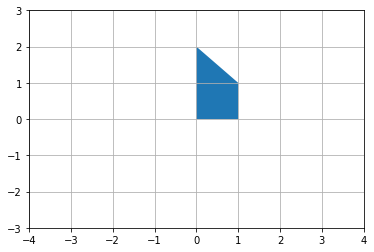

In [11]:
from matplotlib import pyplot as plt

p = Polygone([Vec([0, 0]), Vec([1, 0]), 
              Vec([1, 1]), Vec([0., 2]),
              Vec([0, 1])])

p.trace(left=-4, right = 4, bottom=-3, top=3)

- En utilisant les méthodes `trace` et `transforme`, dessiner l'image du polygone `p` par :
    - une rotation de centre $(-1, 0)$ et d'angle $\pi/2$.
    - une translation de vecteur $(-1, 2)$.

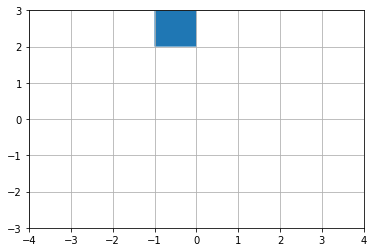

In [12]:
tr = Translation2D(Vec([-1, 2]))
q = p.transforme(tr)
q.trace(left=-4, right = 4, bottom=-3, top=3)

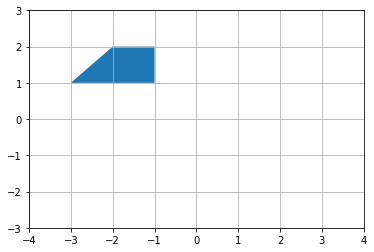

In [13]:
tr = Rotation2D(Vec([-1, 0]), pi/2)
q = p.transforme(tr)
q.trace(left=-4, right = 4, bottom=-3, top=3)

## C. Application : jeu de vaisseau 2D

Pour terminer, voici une ébauche de code d'un petit jeu vidéo de vaisseau spatial. On utilise volontairement le module `tkinter` (et non `upemtk`) directement, pour nous rapprocher d'un fonctionnement proche de JavaScript (création d'un objet `Canvas` et mise en place de "*listeners*" pour les événements).

Le code est intégralement fourni, il suffit de le tester.

#### Polygones

Nous rédéfinissons la classe Polygone afin de pouvoir dessiner sur un canevas `tkinter`.

In [14]:
class Polygone:
    def __init__(self, points):
        self.points = [] if points is None else points
        
    def transforme(self, trans):
        points = map(trans.applique, self.points)
        return Polygone(list(points))
    
    def dessine(self, canevas, etiquette):
        coords = []
        for p in self.points:
            coords.append(p.coeff[0])
            coords.append(p.coeff[1])
        canevas.create_polygon(
            coords, fill="gray", outline="black", width=2, 
            tag=etiquette)

#### Vaisseaux

La dynamique du vaisseau obéit à la seconde loi de Newton (sous forme simplifiée) : l'accélération est proportionnelle à la somme des forces qui s'appliquent sur le vaisseau. Couplé à une boucle principale régulière, cela suffit à donner une impression de mouvement réaliste.

In [15]:
class Vaisseau:
    coef_acceleration = 0.05
    coef_rotation = 0.0003
    
    forme_defaut = Polygone([Vec([-15, 10]), Vec([20, 0]), Vec([-15, -10])])
    
    def __init__(self, jeu, etiquette,
                 position=None, vitesse=None, 
                 direction=0, rotation=0,
                 forme=None):
        self.jeu = jeu
        self.etiquette = etiquette
        self.position = Vec([0, 0]) if position is None else position
        self.vitesse = Vec([0, 0]) if vitesse is None else vitesse
        self.direction = direction
        self.rotation = rotation
        self.forme = Vaisseau.forme_defaut if forme is None else forme
    
    def deplace(self):
        self.position += self.vitesse
        self.direction += self.rotation
        
    def accelere(self):
        vect = Vec([cos(self.direction), sin(self.direction)])
        self.vitesse += vect * Vaisseau.coef_acceleration            
    
    def babord(self):
        self.rotation -= Vaisseau.coef_rotation
        
    def tribord(self):
        self.rotation += Vaisseau.coef_rotation
        
    def gravite(self, other):
        v = other.position - self.position
        d = max(v.norme(), other.rayon)  # pour éviter des effets bizarres
        self.vitesse += v * other.masse * (1 / d ** 3)
    
    def dessine(self):
        self.jeu.canevas.delete(self.etiquette)
        rot = Rotation2D(Vec([0, 0]), self.direction)
        trans = Translation2D(self.position)
        poly = self.forme.transforme(trans.compose(rot))
        poly.dessine(self.jeu.canevas, self.etiquette)

#### Planètes

In [16]:
class Planete:
    
    def __init__(self, jeu, etiquette, position, masse, rayon):
        self.jeu = jeu
        self.etiquette = etiquette
        self.position = position
        self.masse = masse
        self.rayon = rayon
        
    def dessine(self):
        self.jeu.canevas.delete(self.etiquette)
        x, y = self.position.coeff[0], self.position.coeff[1]
        r = self.rayon
        self.jeu.canevas.create_oval(x - r, y - r, x + r, y + r,
                                     fill="gray", outline="black", width=2,
                                     tag=self.etiquette)

#### Interface et boucle principale du jeu

In [19]:
import tkinter as tk

class Jeu:
    
    def __init__(self, largeur, hauteur):
        self.largeur = largeur
        self.hauteur = hauteur
        
        self.racine = tk.Tk()
        self.canevas = tk.Canvas(self.racine, width=largeur, height=hauteur)
        self.canevas.grid(column=0, row=0, sticky=(tk.N, tk.W, tk.E, tk.S))
        
        self.vaisseau = Vaisseau(self, "voyager", 
                                 Vec([largeur/2, hauteur/3]),
                                 Vec([1, 0]))
        self.planete = Planete(self, "terre", 
                               Vec([largeur/2, hauteur/2]), 200, 20)

        self.pressees = set()
        self.keymap = {
            "Up": self.vaisseau.accelere,
            "Left": self.vaisseau.babord,
            "Right": self.vaisseau.tribord
        }
        self.configure_touches()
        
    def configure_touches(self):
        self.racine.bind("<KeyPress>", lambda e: self.pressees.add(e.keysym))
        self.racine.bind("<KeyRelease>", lambda e: self.pressees.discard(e.keysym))

    def traite_touches(self):
        for touche in self.keymap.keys() & self.pressees:
            self.keymap[touche]()
        
    def tour(self):
        self.traite_touches()
        self.vaisseau.deplace()
        self.vaisseau.dessine()
        self.vaisseau.gravite(self.planete)
        self.racine.after(20, self.tour)
        
    def lance(self):
        self.tour()
        self.planete.dessine()
        self.racine.mainloop()

In [21]:
Jeu(800, 800).lance()